In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-04-02,36.0,18.0,139.0,38.0,0.0,2.0,79.0,92.0,254.0,418.0,...,210.0,4308.0,12.0,24.0,3.0,15.0,27.0,0.0,3.0,1.0
2020-04-03,8.0,27.0,185.0,11.0,0.0,6.0,132.0,73.0,214.0,395.0,...,240.0,4516.0,19.0,22.0,7.0,4.0,33.0,0.0,0.0,0.0
2020-04-04,18.0,29.0,80.0,27.0,2.0,0.0,186.0,34.0,220.0,257.0,...,241.0,3788.0,31.0,39.0,2.0,3.0,23.0,0.0,0.0,0.0
2020-04-05,50.0,28.0,69.0,35.0,4.0,0.0,0.0,52.0,137.0,270.0,...,294.0,5959.0,0.0,76.0,4.0,1.0,20.0,4.0,0.0,0.0
2020-04-06,18.0,16.0,103.0,24.0,2.0,0.0,103.0,11.0,110.0,246.0,...,277.0,3843.0,6.0,115.0,6.0,4.0,17.0,0.0,0.0,1.0


### New (moving average, 3 days)

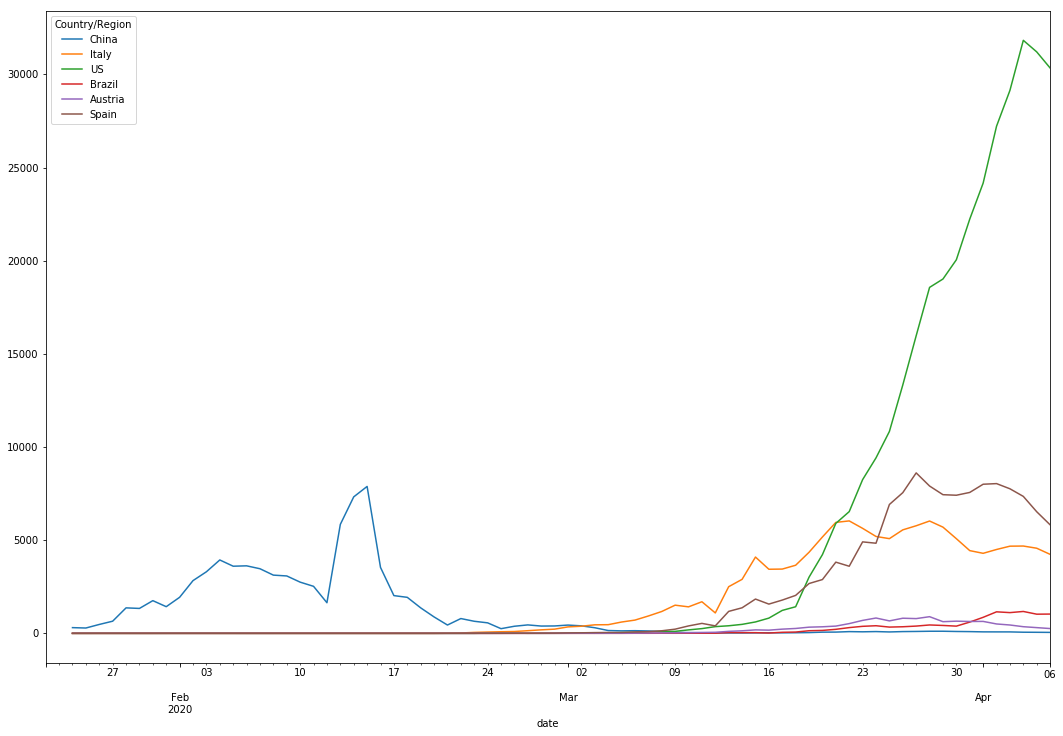

In [4]:
df_daily_cases[["China",
                "Italy",
                "US", 
                "Brazil", 
                "Austria", 
                "Spain"]].rolling(window=3).mean().plot(figsize=(18,12))
plt.show()

### Cumulative (log)

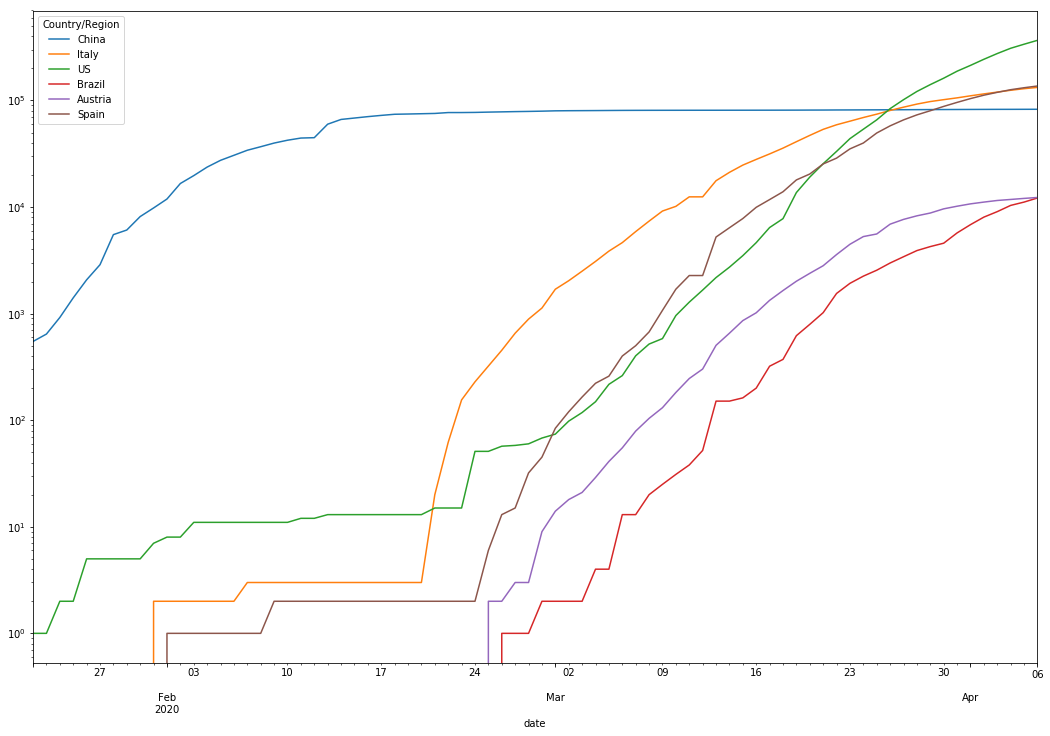

In [5]:
df_cases[["China",
          "Italy",
          "US", 
          "Brazil", 
          "Austria", 
          "Spain"]].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [6]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-04-02,2.0,1.0,28.0,1.0,0.0,0.0,8.0,3.0,4.0,12.0,...,0.0,569.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2020-04-03,0.0,1.0,19.0,1.0,0.0,0.0,3.0,0.0,4.0,10.0,...,1.0,685.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-04-04,1.0,3.0,25.0,1.0,0.0,0.0,4.0,0.0,2.0,18.0,...,1.0,709.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-05,0.0,0.0,22.0,1.0,0.0,0.0,1.0,0.0,5.0,18.0,...,0.0,623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-06,4.0,1.0,21.0,3.0,0.0,0.0,4.0,1.0,5.0,16.0,...,1.0,442.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### New (moving average, 3 days)

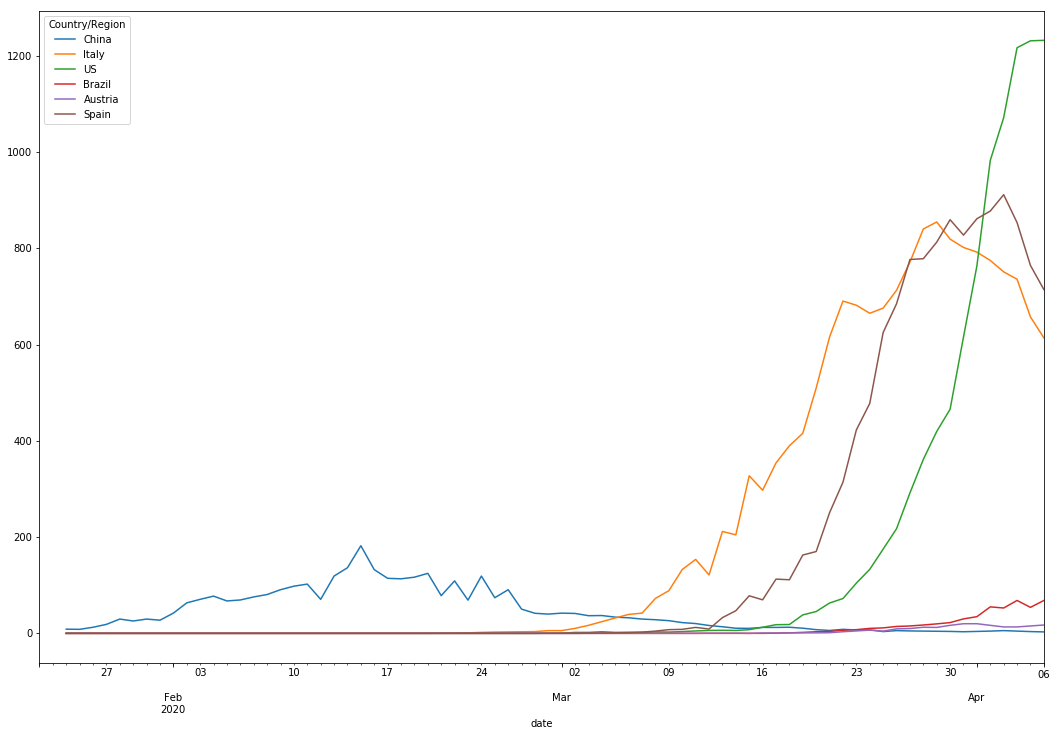

In [8]:
df_daily_deaths[["China",
                 "Italy",
                 "US", 
                 "Brazil", 
                 "Austria", 
                 "Spain"]].rolling(window=3).mean().plot(figsize=(18,12))


plt.show()

### Cumulative (log)

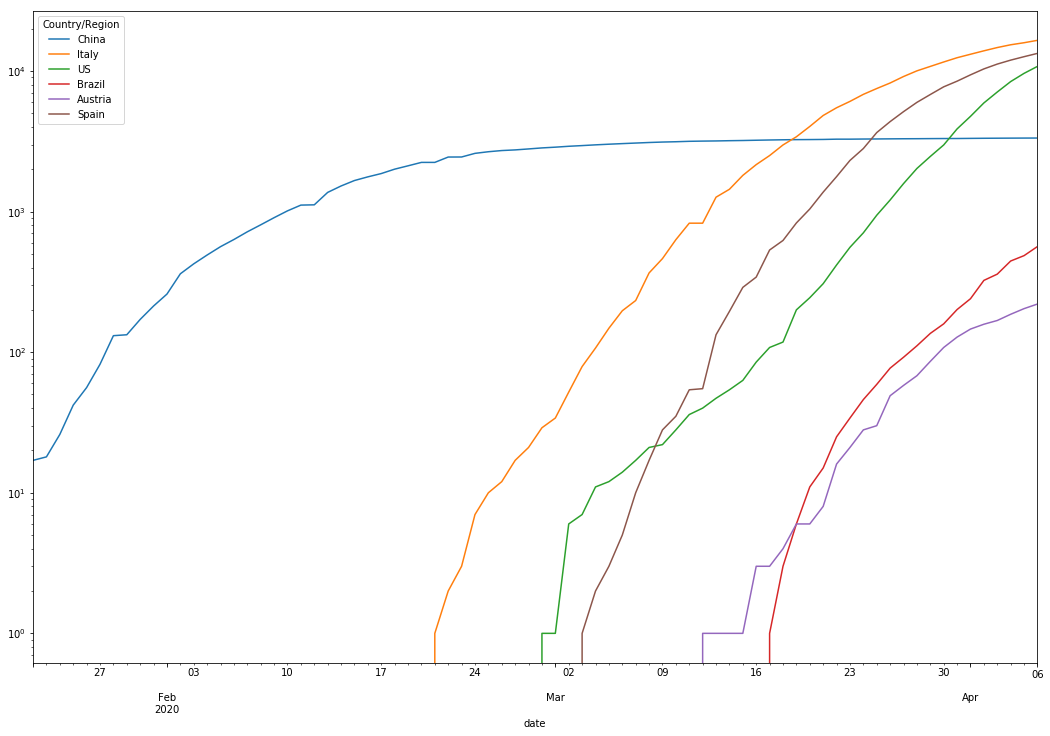

In [9]:
df_deaths[["China",
           "Italy",
           "US", 
           "Brazil", 
           "Austria", 
           "Spain"]].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [10]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)
df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-04-02,5.0,9.0,0.0,0.0,0.0,0.0,8.0,2.0,98.0,313.0,...,35.0,13.0,21.0,13.0,2.0,12.0,0.0,0.0,0.0,0.0
2020-04-03,0.0,13.0,1.0,6.0,0.0,0.0,10.0,10.0,129.0,273.0,...,12.0,16.0,6.0,0.0,9.0,10.0,3.0,0.0,2.0,0.0
2020-04-04,0.0,10.0,28.0,5.0,1.0,0.0,13.0,0.0,52.0,485.0,...,17.0,7.0,25.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2020-04-05,5.0,5.0,0.0,5.0,0.0,0.0,1.0,14.0,56.0,491.0,...,19.0,14.0,0.0,5.0,0.0,0.0,4.0,0.0,1.0,0.0
2020-04-06,3.0,12.0,0.0,5.0,0.0,0.0,45.0,5.0,323.0,465.0,...,23.0,58.0,11.0,0.0,13.0,5.0,-1.0,0.0,2.0,0.0


### New (moving average, 3 days)

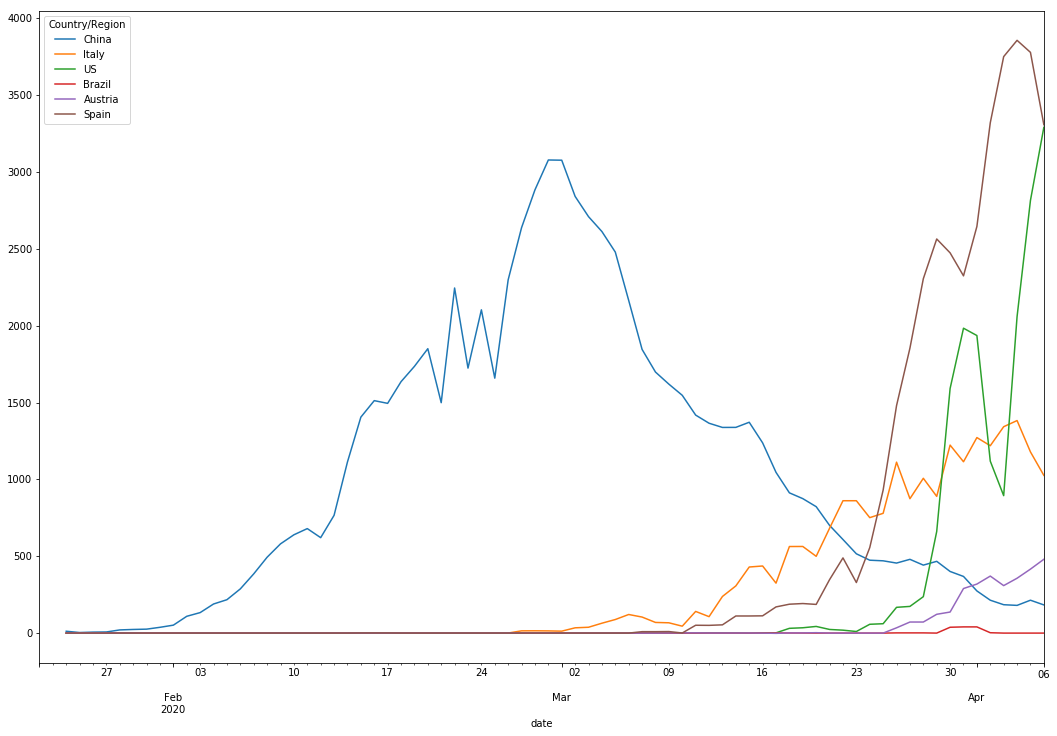

In [12]:
df_daily_recovered[["China",
                    "Italy",
                    "US", 
                    "Brazil", 
                    "Austria", 
                    "Spain"]].rolling(window=3).mean().plot(figsize=(18,12))
plt.show()

### Cumulative (log)

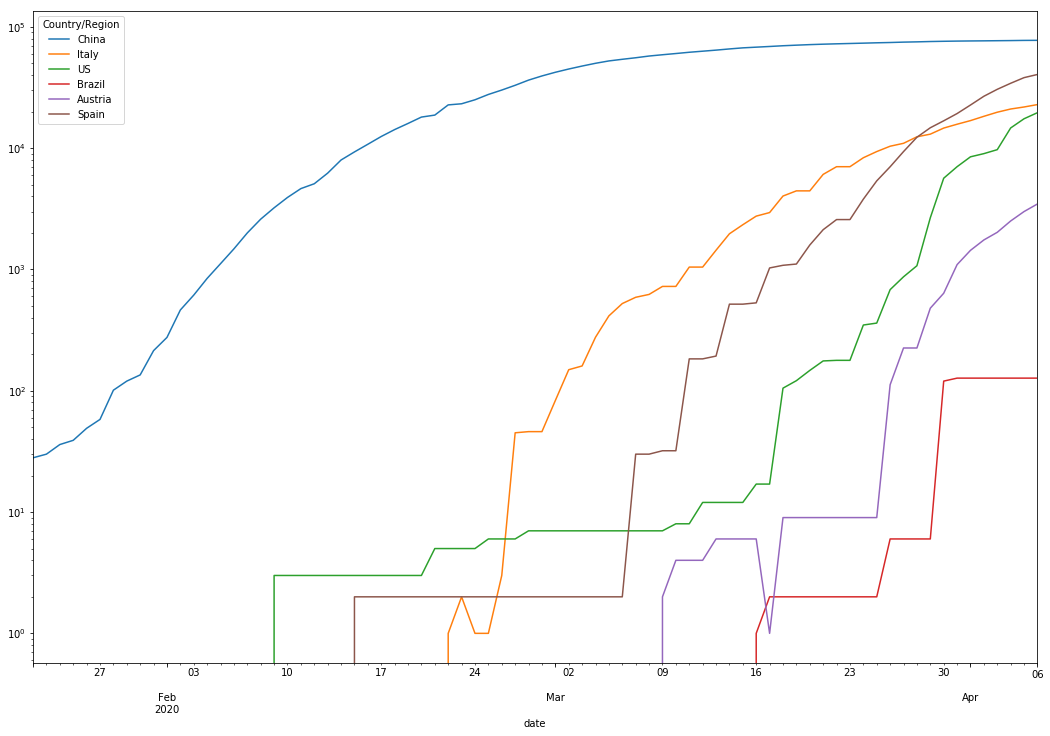

In [13]:
df_recovered[["China",
              "Italy",
              "US", 
              "Brazil", 
              "Austria", 
              "Spain"]].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [14]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [15]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [16]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [17]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [18]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [19]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [20]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [21]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [22]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [23]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [24]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [25]:
array = ["China",
         "Italy",
         "United States", 
         "Brazil", 
         "Austria", 
         "Spain"]

pops = df_wp.loc[df_wp["Country (or dependency)"].isin(array)]["Population (2020)"].values

print(pops)

[1.43932378e+09 3.31002651e+08 2.12559417e+08 6.04618260e+07
 4.67547780e+07 9.00639800e+06]


## Temporal Series - Cumulative Cases per Population

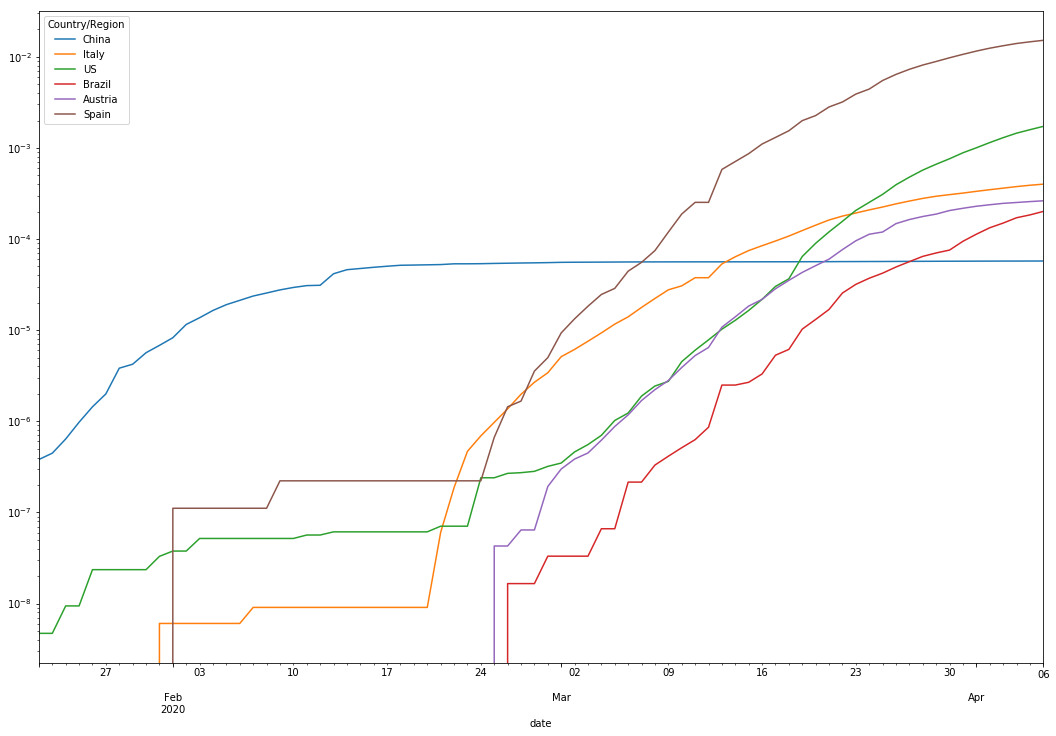

In [26]:
df_cases[["China",
          "Italy",
          "US", 
          "Brazil", 
          "Austria", 
          "Spain"]].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

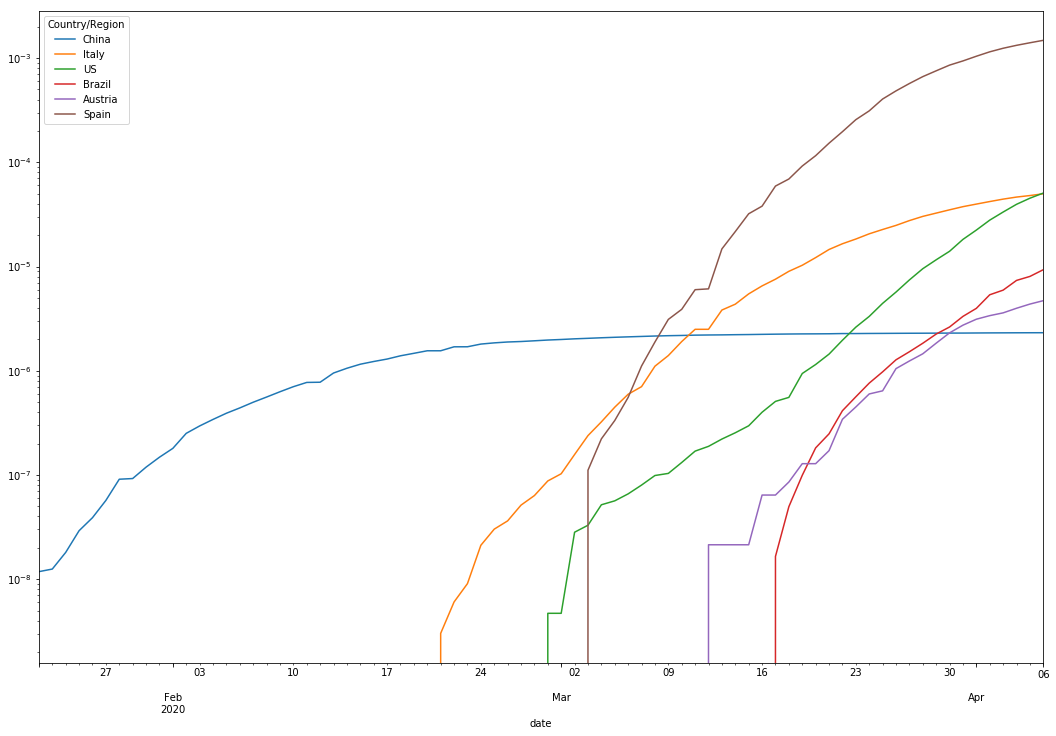

In [27]:
df_deaths[["China",
           "Italy",
           "US", 
           "Brazil", 
           "Austria", 
           "Spain"]].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

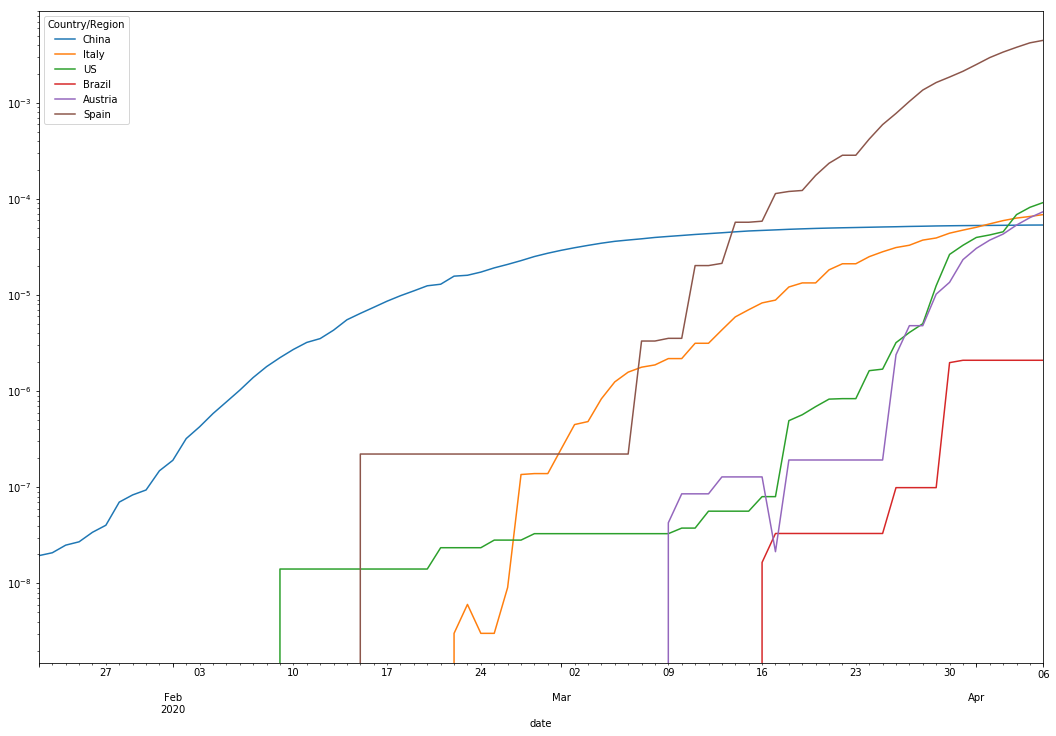

In [28]:
df_recovered[["China",
              "Italy",
              "US", 
              "Brazil", 
              "Austria", 
              "Spain"]].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()